<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


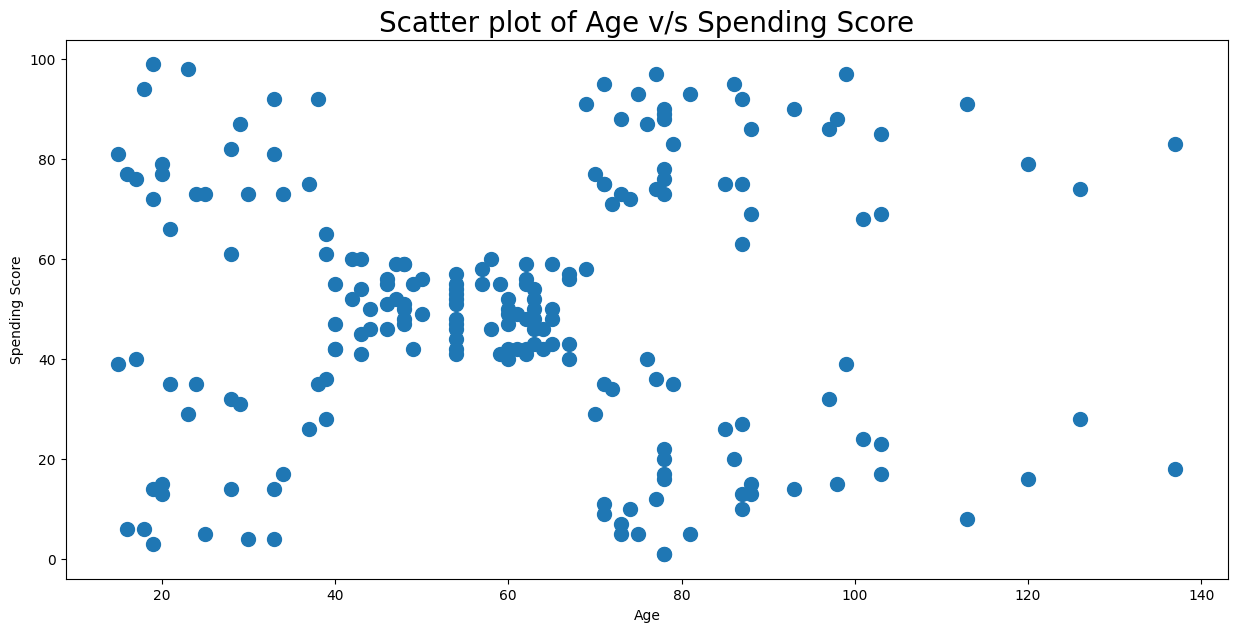

In [2]:
#2D Clustering based on Age and Spending Score¶
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

In [5]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values


algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [8]:
import plotly as py
import plotly.graph_objs as go




trace1 = go.Scatter3d(
  x= df['Age'],
  y= df['Spending Score (1-100)'],
  z= df['Annual Income (k$)'],
  mode='markers',
   marker=dict(
      color = df['cluster'],
         size= 10,
      line=dict(
          color= df['cluster'],
          width= 12
      ),
      opacity=0.8
   )
)
data = [trace1]
layout = go.Layout(
  title= 'Clusters wrt Age, Income and Spending Scores',
  scene = dict(
          xaxis = dict(title  = 'Age'),
          yaxis = dict(title  = 'Spending Score'),
          zaxis = dict(title  = 'Annual Income')
      )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

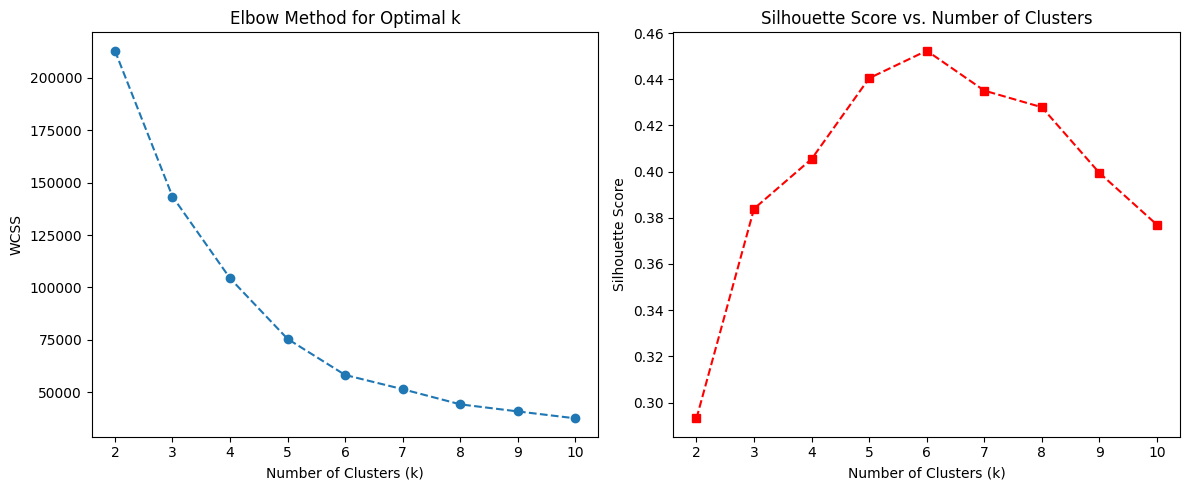

In [9]:
from sklearn.metrics import silhouette_score

# Elbow Method to determine optimal clusters
wcss = []
silhouette_scores = []


cluster_range = range(2, 11)  # Checking clusters from 2 to 10
for k in cluster_range:
   kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan')
   kmeans.fit(X3)
   wcss.append(kmeans.inertia_)  # Sum of squared distances
   silhouette_scores.append(silhouette_score(X3, kmeans.labels_))


# Plot Elbow Curve
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')


# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')


plt.tight_layout()
plt.show()



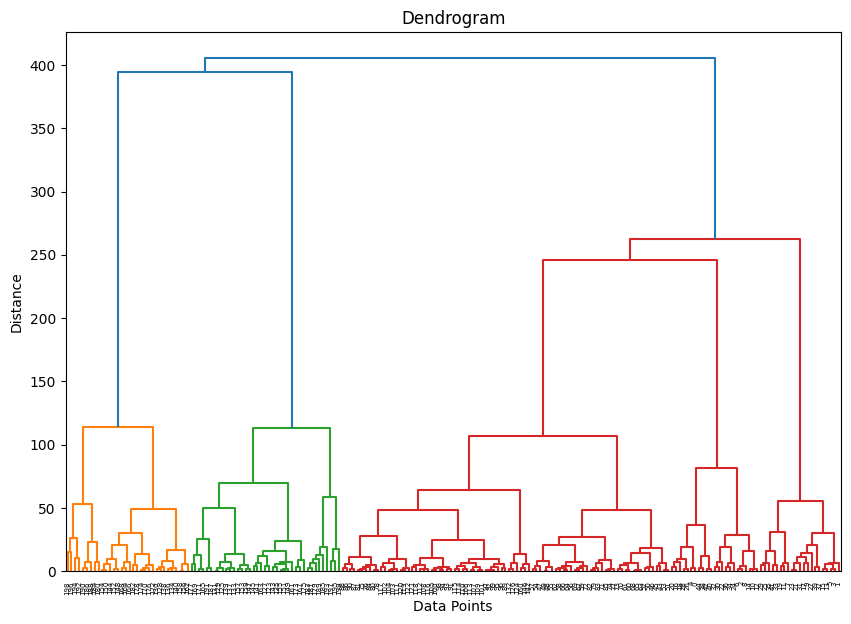

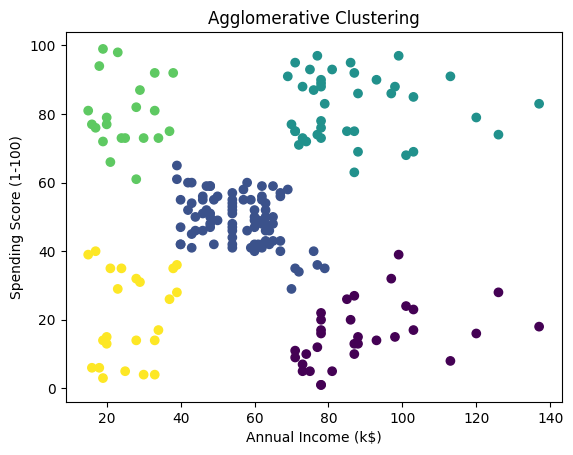

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Load your data (replace with your actual data loading)
url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Mall_Customers.csv"
data = pd.read_csv(url)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]




# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5,linkage='ward')
agg_clustering.fit(X)
labels_agg = agg_clustering.labels_
data['Agglomerative_Cluster'] = labels_agg




# Dendrogram
linked = linkage(X, 'ward')  # You can change the linkage method if needed
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Visualize Agglomerative Clustering Results
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agglomerative_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [11]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.0/684.0 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00


In [12]:
import lazypredict
#ml jar ,Pycaret, auto ml do same get data and say which model is best

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.616197 -> initscore=0.473438
[LightGBM] [Info] Start training from score 0.473438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 